In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Daten importieren und vorbereiten

In [138]:
df = pd.read_csv('results_add_grid.csv')
df.head()

,Language,Class,Duration
0,GodotEditor,NestedGrid,19.393538
1,GodotEditor,NestedGrid,19.101994
2,GodotEditor,NestedGrid,19.256354
3,GodotEditor,NestedGrid,19.209771
4,GodotEditor,NestedGrid,19.857985


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Language  390 non-null    object 
 1   Class     390 non-null    object 
 2   Duration  390 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.3+ KB


## Get average duration of each class

In [140]:
average_duration = df.groupby(['Language', 'Class'])['Duration'].mean().reset_index()
average_duration.sort_values(by='Duration', inplace=True, ascending=False)
average_duration

,Language,Class,Duration
2,GodotEditor,FlatDictGrid,21.851222
4,GodotEditor,NestedGrid,19.811510
3,GodotEditor,FlatGrid,18.464763
5,GodotExport,FlatDictGrid,17.669214
7,GodotExport,NestedGrid,16.132341
6,GodotExport,FlatGrid,14.111194
9,Python,FlatDictGrid,13.894792
8,Python,DictGrid,13.489583
10,Python,FlatGrid,12.287500
11,Python,NestedGrid,10.582812


In [141]:
sns.set_theme()
sns.set_style("whitegrid")
class_colors = {'NestedGrid': '#3274A1',
                'FlatGrid': '#E1812C',
                'DictGrid': '#3A923A',
                'FlatDictGrid': '#C03D3E',
                'npNestedGrid': '#8D5EB9'}

Text(0.5, 1.0, 'Average Duration of each Class by Language')

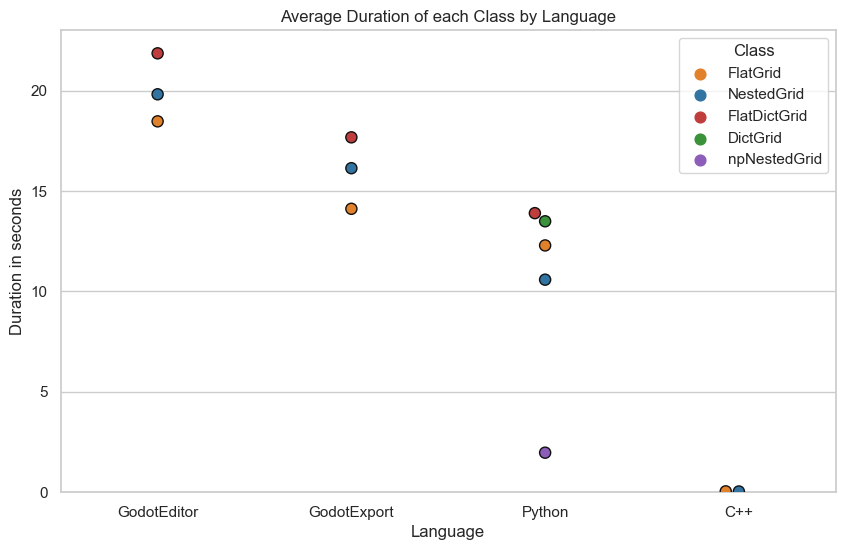

In [142]:
plt.figure(figsize=(10, 6))

language_order = ['GodotEditor', 'GodotExport', 'Python', 'C++']
average_duration = df.groupby(['Language', 'Class'])['Duration'].mean().reset_index()

sns.swarmplot(x='Language', y='Duration',
              data=average_duration, hue='Class',
              order=language_order, palette=class_colors,
              size=8, linewidth=1, edgecolor='#111111')
plt.xlabel('Language')
plt.ylabel('Duration in seconds')
plt.ylim(0, 23)
plt.title('Average Duration of each Class by Language')

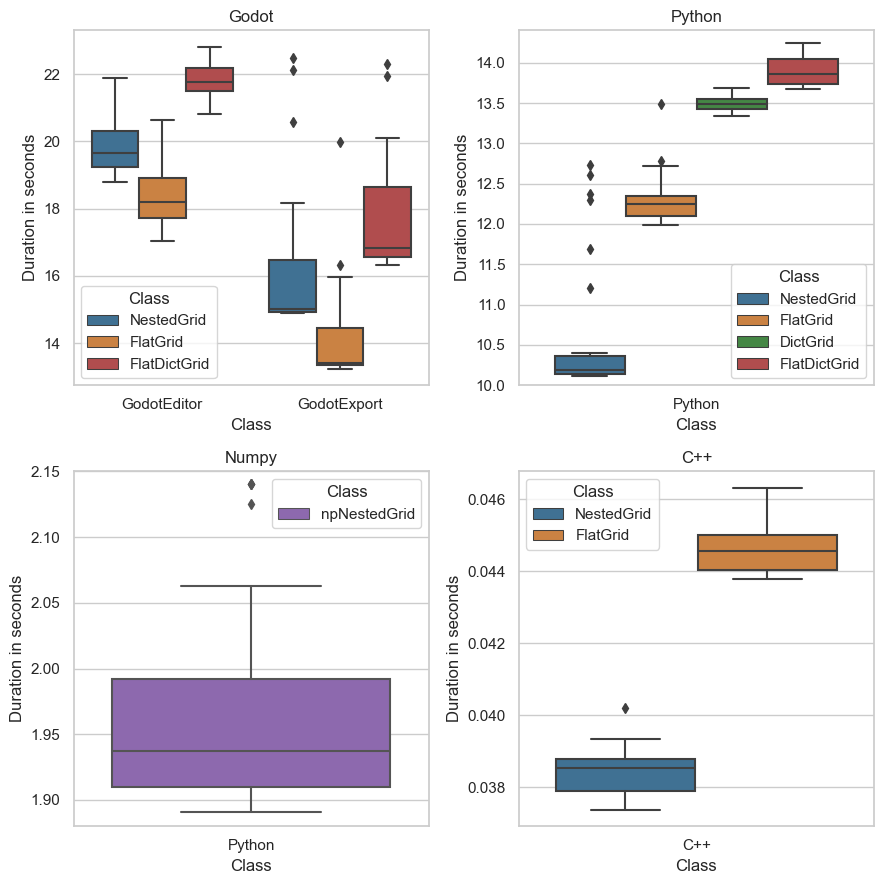

In [143]:
plt.figure(figsize=(9, 9))

# Erster Boxplot
plt.subplot(2, 2, 1)
sns.boxplot(x='Language', y='Duration',
           data=df[(df['Language'] == 'GodotEditor') | (df['Language'] == 'GodotExport')],
           hue='Class', palette=class_colors)
plt.xlabel('Class')
plt.ylabel('Duration in seconds')
plt.title('Godot')

# Zweiter Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x='Language', y='Duration',
           data=df[(df['Language'] == 'Python') & (df['Class'] != 'npNestedGrid')],
           hue='Class', palette=class_colors)
plt.xlabel('Class')
plt.ylabel('Duration in seconds')
plt.ylim(10, 14.4)
plt.title('Python')

# Dritter Boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x='Language', y='Duration',
           data=df[(df['Language'] == 'Python') & (df['Class'] == 'npNestedGrid')],
           hue='Class', palette=class_colors)
plt.xlabel('Class')
plt.ylabel('Duration in seconds')
plt.ylim(1.88, 2.15)
plt.title('Numpy')

# Vierter Boxplot
plt.subplot(2, 2, 4)
sns.boxplot(x='Language', y='Duration',
           data=df[(df['Language'] == 'C++')],
           hue='Class', palette=class_colors)
plt.xlabel('Class')
plt.ylabel('Duration in seconds')
plt.title('C++')

plt.tight_layout()  # Verbessert die Anordnung der Plots